In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
#convertir cadena de texto a datatime
fechaStr = '2023-01-01 10:00:00'
fechaDt = pd.to_datetime(fechaStr)
print(type(fechaDt))
print(type(fechaStr))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>


In [3]:
#Creando un objeto timestamp en Pandas
timestamp = pd.Timestamp(datetime.now())
print(timestamp)

2025-12-17 09:01:52.686523


In [4]:
#creando un datetimeIndex en pandas
meses = pd.date_range(start="2024-01-01", end='2024-12-31', freq='ME')
print(meses)

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')


In [5]:
dias = pd.date_range(start='1993-09-01', end='1993-09-30', freq='D')
print(dias)

DatetimeIndex(['1993-09-01', '1993-09-02', '1993-09-03', '1993-09-04',
               '1993-09-05', '1993-09-06', '1993-09-07', '1993-09-08',
               '1993-09-09', '1993-09-10', '1993-09-11', '1993-09-12',
               '1993-09-13', '1993-09-14', '1993-09-15', '1993-09-16',
               '1993-09-17', '1993-09-18', '1993-09-19', '1993-09-20',
               '1993-09-21', '1993-09-22', '1993-09-23', '1993-09-24',
               '1993-09-25', '1993-09-26', '1993-09-27', '1993-09-28',
               '1993-09-29', '1993-09-30'],
              dtype='datetime64[ns]', freq='D')


frecuencias que soporta freq  
Diarias (D):  
'D' : Día a día.  
Mensuales (M):  
'M' : Último día del mes.  
'MS' : Primer día del mes.  
Anuales (A):  
'A' : Último día del año.  
'AS' : Primer día del año.  
Semanales (W):  
'W' : Último día de la semana (domingo).  
'WS' : Primer día de la semana (lunes).  
Horarias (H):  
'H' : Cada hora.  
Minutos (T):  
'T' o 'min' : Cada minuto.  
Segundos (S):  
'S' : Cada segundo.  
Frecuencias personalizadas:  
'B' : Día hábil (lunes a viernes).  
'C' : Día hábil personalizado (requiere definir calendario).  
'W-MON' : Para frecuencia semanal pero con un día específico como inicio de semana (en este caso lunes).  

In [6]:
#Creacion de series de tiempo
serie = pd.Series(np.random.randn(len(meses)), index=meses)
print(serie)

2024-01-31   -0.101039
2024-02-29    0.078784
2024-03-31   -0.596395
2024-04-30   -1.215790
2024-05-31   -1.123692
2024-06-30    0.614736
2024-07-31    0.684311
2024-08-31    1.043921
2024-09-30    0.850163
2024-10-31   -0.268769
2024-11-30   -0.729486
2024-12-31   -0.667315
Freq: ME, dtype: float64


In [7]:
serieDiaria = pd.Series(np.random.randn(30), index=pd.date_range(start='1993-09-01', end='1993-09-30', freq='D'))
print(serieDiaria)

1993-09-01    0.618945
1993-09-02   -0.405454
1993-09-03   -1.692224
1993-09-04   -0.093231
1993-09-05   -1.208644
1993-09-06   -1.522685
1993-09-07   -1.385157
1993-09-08    0.165053
1993-09-09    0.341411
1993-09-10   -0.939181
1993-09-11    1.658903
1993-09-12    0.405832
1993-09-13    2.126794
1993-09-14   -1.580820
1993-09-15    1.236026
1993-09-16    0.150653
1993-09-17   -0.445628
1993-09-18   -0.369902
1993-09-19   -0.602304
1993-09-20   -1.117741
1993-09-21    0.324636
1993-09-22   -1.526917
1993-09-23   -1.864925
1993-09-24   -0.815241
1993-09-25   -1.105619
1993-09-26    0.378886
1993-09-27   -1.579023
1993-09-28   -0.286570
1993-09-29   -2.679044
1993-09-30    0.041757
Freq: D, dtype: float64


In [8]:
#desplazamiento o "shifting"
serieShifting = serie.shift(1)
print(serieShifting) 

2024-01-31         NaN
2024-02-29   -0.101039
2024-03-31    0.078784
2024-04-30   -0.596395
2024-05-31   -1.215790
2024-06-30   -1.123692
2024-07-31    0.614736
2024-08-31    0.684311
2024-09-30    1.043921
2024-10-31    0.850163
2024-11-30   -0.268769
2024-12-31   -0.729486
Freq: ME, dtype: float64


In [9]:
#Cambio de frecuencia a datos mensuales con asfreq
serieMensual = serieDiaria.asfreq('ME')
print(serieMensual)

1993-09-30    0.041757
Freq: ME, dtype: float64


In [10]:
#Remuestreo de datos diarios en datos mensuales con resample
serieResample = serieDiaria.resample('ME').mean()
print(serieMensual)

1993-09-30    0.041757
Freq: ME, dtype: float64


In [11]:
#asignando una zona horaria
serieTiempoTz = serieDiaria.tz_localize('UTC')
print(serieTiempoTz)

1993-09-01 00:00:00+00:00    0.618945
1993-09-02 00:00:00+00:00   -0.405454
1993-09-03 00:00:00+00:00   -1.692224
1993-09-04 00:00:00+00:00   -0.093231
1993-09-05 00:00:00+00:00   -1.208644
1993-09-06 00:00:00+00:00   -1.522685
1993-09-07 00:00:00+00:00   -1.385157
1993-09-08 00:00:00+00:00    0.165053
1993-09-09 00:00:00+00:00    0.341411
1993-09-10 00:00:00+00:00   -0.939181
1993-09-11 00:00:00+00:00    1.658903
1993-09-12 00:00:00+00:00    0.405832
1993-09-13 00:00:00+00:00    2.126794
1993-09-14 00:00:00+00:00   -1.580820
1993-09-15 00:00:00+00:00    1.236026
1993-09-16 00:00:00+00:00    0.150653
1993-09-17 00:00:00+00:00   -0.445628
1993-09-18 00:00:00+00:00   -0.369902
1993-09-19 00:00:00+00:00   -0.602304
1993-09-20 00:00:00+00:00   -1.117741
1993-09-21 00:00:00+00:00    0.324636
1993-09-22 00:00:00+00:00   -1.526917
1993-09-23 00:00:00+00:00   -1.864925
1993-09-24 00:00:00+00:00   -0.815241
1993-09-25 00:00:00+00:00   -1.105619
1993-09-26 00:00:00+00:00    0.378886
1993-09-27 0

In [12]:
#convertir a otra zona horaria
serieTiempoTzNy = serieTiempoTz.tz_convert('America/New_York')
print(serieTiempoTzNy)

1993-08-31 20:00:00-04:00    0.618945
1993-09-01 20:00:00-04:00   -0.405454
1993-09-02 20:00:00-04:00   -1.692224
1993-09-03 20:00:00-04:00   -0.093231
1993-09-04 20:00:00-04:00   -1.208644
1993-09-05 20:00:00-04:00   -1.522685
1993-09-06 20:00:00-04:00   -1.385157
1993-09-07 20:00:00-04:00    0.165053
1993-09-08 20:00:00-04:00    0.341411
1993-09-09 20:00:00-04:00   -0.939181
1993-09-10 20:00:00-04:00    1.658903
1993-09-11 20:00:00-04:00    0.405832
1993-09-12 20:00:00-04:00    2.126794
1993-09-13 20:00:00-04:00   -1.580820
1993-09-14 20:00:00-04:00    1.236026
1993-09-15 20:00:00-04:00    0.150653
1993-09-16 20:00:00-04:00   -0.445628
1993-09-17 20:00:00-04:00   -0.369902
1993-09-18 20:00:00-04:00   -0.602304
1993-09-19 20:00:00-04:00   -1.117741
1993-09-20 20:00:00-04:00    0.324636
1993-09-21 20:00:00-04:00   -1.526917
1993-09-22 20:00:00-04:00   -1.864925
1993-09-23 20:00:00-04:00   -0.815241
1993-09-24 20:00:00-04:00   -1.105619
1993-09-25 20:00:00-04:00    0.378886
1993-09-26 2

In [13]:
#Zonas horarias disponibles
import pytz

for tz in pytz.all_timezones:
    print(tz)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad

In [14]:
#crear un objeto periodo
periodo = pd.Period('1993-09')
print(periodo)

1993-09


In [15]:
#Agregar un periodo
periodoMasUno = periodo + 1
print(periodoMasUno) 

1993-10


In [16]:
#periodo con dia
periodod = pd.Period('1993-09-01')
print(periodod)

1993-09-01


In [17]:
#Agregar un periodo dia
periodoDiaUno = periodod + 1
print(periodoDiaUno) 

1993-09-02


In [18]:
from datetime import timedelta
#Crando un objeto timedelta
#Creando un objeto Timestamp en pandas
timestamp = pd.Timestamp(datetime.now())
print(timestamp)
delta = timedelta(days=7)
print(delta)
nuevaFecha = timestamp + delta
print(nuevaFecha)

2025-12-17 09:02:03.677992
7 days, 0:00:00
2025-12-24 09:02:03.677992


weeks = número de semanas  
days = número de dias  
hours = número de horas  
minutes = número de minutos  
seconds = número de segundos  
milliseconds = número de milisegundos  
microseconds = número de microsegundos  

In [19]:
#Creando una serie de tiempo
st = pd.date_range(start='1993-09-01', end='1993-09-30', freq='D')
serieTiempo = pd.Series(np.random.randn(len(st)), index=st)
#Agregando una duracion a la serie
serieTiempoPlusDelta =  serieTiempo.index + delta
print(serieTiempoPlusDelta)

DatetimeIndex(['1993-09-08', '1993-09-09', '1993-09-10', '1993-09-11',
               '1993-09-12', '1993-09-13', '1993-09-14', '1993-09-15',
               '1993-09-16', '1993-09-17', '1993-09-18', '1993-09-19',
               '1993-09-20', '1993-09-21', '1993-09-22', '1993-09-23',
               '1993-09-24', '1993-09-25', '1993-09-26', '1993-09-27',
               '1993-09-28', '1993-09-29', '1993-09-30', '1993-10-01',
               '1993-10-02', '1993-10-03', '1993-10-04', '1993-10-05',
               '1993-10-06', '1993-10-07'],
              dtype='datetime64[ns]', freq='D')


In [20]:
#Creando un dataframe con columna de fecha en formato texto
df = pd.DataFrame({'fecha': ['2023-01-01', '2023-01-02', '2023-01-03'],
                    'valor': [1,2,3]
                    })

#convertir la columna fecha a tipo fecha
df['fecha'] = pd.to_datetime(df['fecha'])

print(df)

       fecha  valor
0 2023-01-01      1
1 2023-01-02      2
2 2023-01-03      3


In [21]:
precios = pd.Series(np.random.randn(100), index=pd.date_range(start='2023-01-01', periods=100, freq='D'))
print(precios)
#calcular la media movis de los ultimos 7 dias
mediaMovil = precios.rolling(window=7).mean()
print(mediaMovil)

2023-01-01   -0.769875
2023-01-02   -2.154606
2023-01-03   -0.044490
2023-01-04   -0.979577
2023-01-05    1.156686
                ...   
2023-04-06    0.020815
2023-04-07    0.415298
2023-04-08    0.483394
2023-04-09   -0.288664
2023-04-10   -1.026364
Freq: D, Length: 100, dtype: float64
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
                ...   
2023-04-06   -0.139511
2023-04-07   -0.071913
2023-04-08    0.243963
2023-04-09    0.200642
2023-04-10    0.239925
Freq: D, Length: 100, dtype: float64


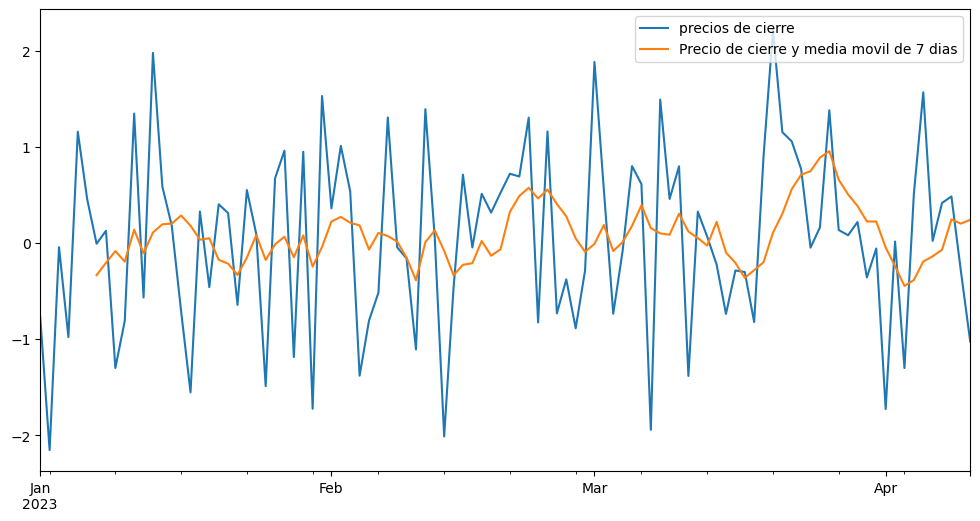

In [22]:
import matplotlib.pyplot as plt

#trazar la serie de tiempo de precios y la media movil
plt.figure(figsize=(12,6))
precios.plot(label="precios de cierre")
mediaMovil.plot(label="Precio de cierre y media movil de 7 dias")
plt.legend()
plt.show()